In [1]:
# Use numpy library to convert data in the Human Activity Recognition dataset into arrays
import numpy as np 
# Pandas library is used for data manipulation and data analysis
import pandas as pd 
# Use seaborn library for data visualization
import seaborn as sns
# Matplotlib library is used for plot generation
import matplotlib.pyplot as plt
# Use Sequential to group a linear stack of layers into a keras.model
from keras.models import Sequential
# This is used to add Dense and Dropout layers to network 
from keras.layers import Dense,Dropout
# This is used to save keras model (or model weights) at a specific interval or frequency
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Use scikit-learn metrics for evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
# This estimator is used to translate features by scaling each feature to a given range (scale)
from sklearn.preprocessing import MinMaxScaler
# This is used to transform a class vector to binary class matrix
from keras.utils import to_categorical
# Use to define runtime configuration consisiting the default styles for each created plot element 
from pylab import rcParams

Using TensorFlow backend.


In [2]:
# Load the HAR training dataset 
df1 = pd.read_csv("train.csv")
# Load the HAR testing dataset
df2 = pd.read_csv("test.csv")

In [3]:
# Display the first 5 instances of df1 dataframe of training dataset
df1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Display the Transpose of df1 dataframe of training dataset
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865,-0.849632,-0.85215,-0.851017,-0.847971,-0.848294,...,-0.830575,-0.799426,-0.787935,-0.780362,-0.797272,-0.791883,-0.77184,-0.779133,-0.785181,-0.783267
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151,0.184823,0.18217,0.183779,0.188982,0.19031,...,0.213174,0.23549,0.24449,0.249624,0.234996,0.238604,0.252676,0.249145,0.246432,0.246809
"angle(Z,gravityMean)",-0.0586269,-0.0543167,-0.0491178,-0.0476632,-0.0438923,-0.0421264,-0.04301,-0.0419758,-0.0373639,-0.0344173,...,-0.00510524,-0.00164732,0.00953791,0.0278779,0.048907,0.0498191,0.0500526,0.0408112,0.0253395,0.0366948
subject,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30


In [5]:
# Print the unique activity names in the training dataframe
print(df1.Activity.unique())
# Print the count of each particular activity
print(df1.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


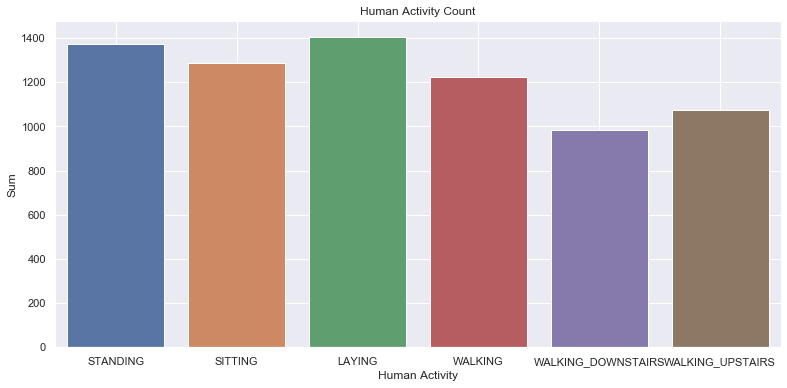

In [6]:
# Plot the different activities with respective to their counts
sns.set(rc={'figure.figsize':(13,6)})
activity_fig = sns.countplot(x = "Activity" , data = df1)
plt.xlabel("Human Activity")
plt.ylabel("Sum")
plt.title("Human Activity Count")
plt.grid(True)
plt.show(activity_fig)

In [7]:
# Retrieve the cross tabulation of activity and subject 
pd.crosstab(df1.subject, df1.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [8]:
# Display the shape of df1 (Training dataset) and df2 (Testing dataset)
print(df1.shape , df2.shape)

(7352, 563) (2947, 563)


In [9]:
# Display the columns of df1 (Training dataset)
df1.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

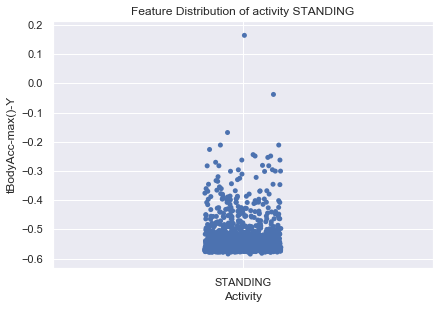

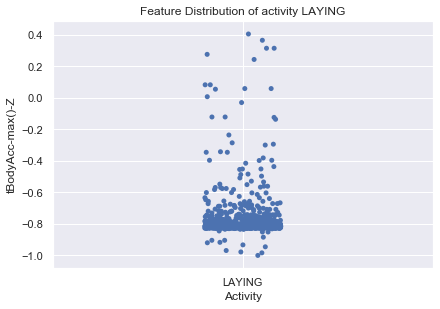

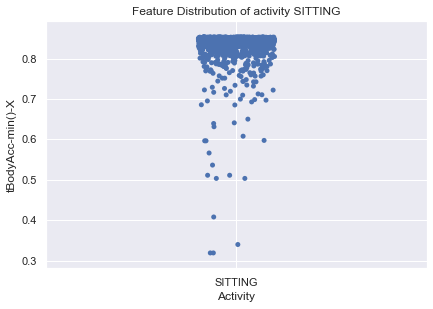

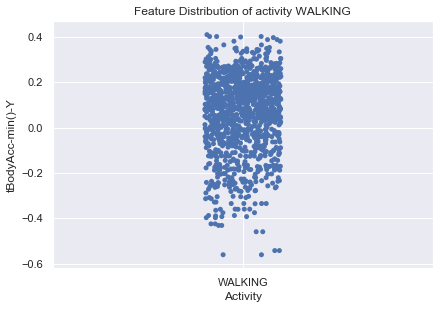

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
# Plot the feature distibution of activity "STANDING"
plt.subplot(221)
activity_fig1 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="STANDING"].iloc[:,10], data= df1.loc[df1['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution of activity STANDING")
plt.grid(True)
plt.show(activity_fig1)
# Plot the feature distibution of activity "LAYING"
plt.subplot(221)
activity_fig2 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="LAYING"].iloc[:,11], data= df1.loc[df1['Activity']=="LAYING"], jitter=True)
plt.title("Feature Distribution of activity LAYING")
plt.grid(True)
plt.show(activity_fig2)
# Plot the feature distibution of activity "SITTING"
plt.subplot(221)
activity_fig3 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="SITTING"].iloc[:,12], data= df1.loc[df1['Activity']=="SITTING"], jitter=True)
plt.title("Feature Distribution of activity SITTING")
plt.grid(True)
plt.show(activity_fig3)
# Plot the feature distibution of activity "WALKING"
plt.subplot(221)
activity_fig4 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="WALKING"].iloc[:,13], data= df1.loc[df1['Activity']=="WALKING"], jitter=True)
plt.title("Feature Distribution of activity WALKING")
plt.grid(True)
plt.show(activity_fig4)


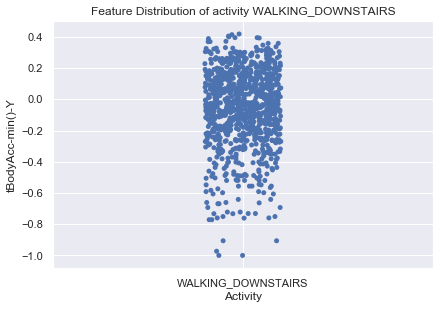

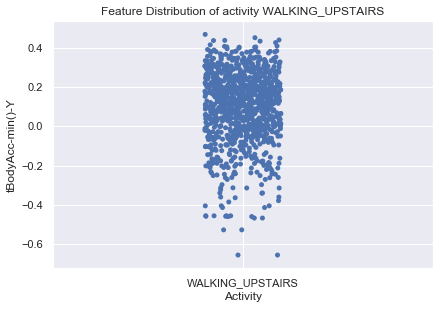

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
# Plot the feature distibution of activity "WALKING_DOWNSTAIRS"
plt.subplot(221)
activity_fig5 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="WALKING_DOWNSTAIRS"].iloc[:,13], data= df1.loc[df1['Activity']=="WALKING_DOWNSTAIRS"], jitter=True)
plt.title("Feature Distribution of activity WALKING_DOWNSTAIRS")
plt.grid(True)
plt.show(activity_fig5)
# Plot the feature distibution of activity "WALKING_UPSTAIRS"
plt.subplot(221)
activity_fig6 = sns.stripplot(x='Activity', y= df1.loc[df1['Activity']=="WALKING_UPSTAIRS"].iloc[:,13], data= df1.loc[df1['Activity']=="WALKING_UPSTAIRS"], jitter=True)
plt.title("Feature Distribution of activity WALKING_UPSTAIRS")
plt.grid(True)
plt.show(activity_fig6)

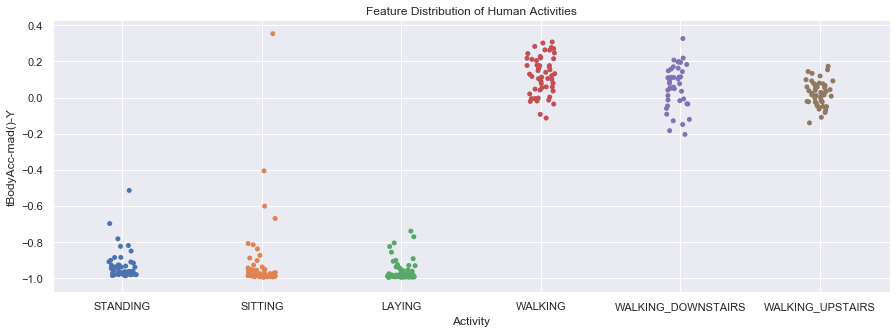

In [12]:
# Display feature distribution of each activity
sns.set(rc={'figure.figsize':(15,5)})
human_activty_fig = sns.stripplot(x='Activity', y= df1.loc[df1['subject']==15].iloc[:,7], data= df1.loc[df1['subject']==15], jitter=True)
plt.title("Feature Distribution of Human Activities")
plt.grid(True)
plt.show(human_activty_fig)

In [13]:
# Initialize a MinMaxScaler object as training_scaler
training_scaler = MinMaxScaler()
# Fit the training dataframe into training scaler instance
training_scaler.fit(df1.iloc[:,0:562])
# Transform the training_scaler 
training_set = training_scaler.transform(df1.iloc[:,0:562])
#Display the training set
print(training_set)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [14]:
# Initialize a MinMaxScaler object as testing_scaler
testing_scaler = MinMaxScaler()
# Fit the training dataframe into testing scaler instance
testing_scaler.fit(df2.iloc[:,0:562])
# Transform the testing_scaler
testing_set = testing_scaler.transform(df2.iloc[:,0:562])
#Display the testing set
print(testing_set)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [15]:
# Initialize an array of activity_training_array
activity_training_array = []
# Append those activities into the activity_training_array
for activity in df1.Activity:
    if activity == "WALKING": activity_training_array.append(0)
    if activity == "WALKING_UPSTAIRS": activity_training_array.append(1)
    if activity == "WALKING_DOWNSTAIRS": activity_training_array.append(2)
    if activity == "SITTING": activity_training_array.append(3)
    if activity == "STANDING": activity_training_array.append(4)
    if activity == "LAYING": activity_training_array.append(5)
# Add a new column into df1 dataframe named as activity_n
# Store the activity_training_array values to Activity_n column 
df1["Activity_n"] = activity_training_array

In [16]:
# Initialize an array of activity_testing_array
activity_testing_array = []
# Append those activities into the activity_testing_array
for activity in df2.Activity:
    if activity == "WALKING": activity_testing_array.append(0)
    if activity == "WALKING_UPSTAIRS": activity_testing_array.append(1)
    if activity == "WALKING_DOWNSTAIRS": activity_testing_array.append(2)
    if activity == "SITTING": activity_testing_array.append(3)
    if activity == "STANDING": activity_testing_array.append(4)
    if activity == "LAYING": activity_testing_array.append(5)
# Add a new column into df2 dataframe named as activity_n
# Store the activity_testing_array values to Activity_n column
df2["Activity_n"] = activity_testing_array

In [17]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151,0.184823,0.18217,0.183779,0.188982,0.19031,...,0.213174,0.23549,0.24449,0.249624,0.234996,0.238604,0.252676,0.249145,0.246432,0.246809
"angle(Z,gravityMean)",-0.0586269,-0.0543167,-0.0491178,-0.0476632,-0.0438923,-0.0421264,-0.04301,-0.0419758,-0.0373639,-0.0344173,...,-0.00510524,-0.00164732,0.00953791,0.0278779,0.048907,0.0498191,0.0500526,0.0408112,0.0253395,0.0366948
subject,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30
Activity,STANDING,STANDING,STANDING,STANDING,STANDING,STANDING,STANDING,STANDING,STANDING,STANDING,...,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS,WALKING_UPSTAIRS


In [18]:
# Remove the Activity column in training dataset
df1.drop(["Activity"] , axis = 1 , inplace = True)

In [19]:
# Remove the Activity column in testing dataset
df2.drop(["Activity"] , axis = 1 , inplace = True)

In [20]:
# Assign the 6 activity classes to y_activity_train
y_activity_train = to_categorical(df1.Activity_n , num_classes=6)
# Assign the 6 activity classes to y_activity_test
y_activity_test = to_categorical(df2.Activity_n , num_classes=6)

In [21]:
y_activity_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# Assign the training_set to X_activity_train
X_activity_train = training_set 
# Assign the testing_set to X_activity_test
X_activity_test = testing_set

In [23]:
# Print the X_activity_train and y_activity_train
print(X_activity_train.shape , y_activity_train.shape)
# Print the X_activity_test and y_activity_test
print(X_activity_test.shape , y_activity_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [24]:
# Implementing the Artificial Neural Network
activity_model=Sequential()

activity_model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_activity_train.shape[1]))

activity_model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

activity_model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

activity_model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))
    
activity_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [25]:
# Print the details of implemented activity_model
print(activity_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                36032     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 52,998
Trainable params: 52,998
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Create an instance of EarlyStopping 
customized_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [27]:
# Initialize the filepath to save the best weights
activity_filepath="Best_weight.hdf5"
# Create an instance of ModelCheckpoint
activity_checkpoint = ModelCheckpoint(activity_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [28]:
# Fit the X_activity_train and y_activity_train to the implemented model
activity_record = activity_model.fit(X_activity_train,y_activity_train,batch_size=256,epochs=50,validation_data=(X_activity_test,y_activity_test), callbacks=[activity_checkpoint,customized_early_stopping])

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 1s 83us/step - loss: 1.5447 - accuracy: 0.3483 - val_loss: 1.1066 - val_accuracy: 0.4055

Epoch 00001: val_accuracy improved from -inf to 0.40550, saving model to Best_weight.hdf5
Epoch 2/50
7352/7352 [==============================] - 0s 41us/step - loss: 1.0370 - accuracy: 0.4313 - val_loss: 1.0162 - val_accuracy: 0.5036

Epoch 00002: val_accuracy improved from 0.40550 to 0.50356, saving model to Best_weight.hdf5
Epoch 3/50
7352/7352 [==============================] - 0s 49us/step - loss: 0.8487 - accuracy: 0.6094 - val_loss: 0.7811 - val_accuracy: 0.6200

Epoch 00003: val_accuracy improved from 0.50356 to 0.61995, saving model to Best_weight.hdf5
Epoch 4/50
7352/7352 [==============================] - 0s 55us/step - loss: 0.6019 - accuracy: 0.7325 - val_loss: 0.6347 - val_accuracy: 0.7055

Epoch 00004: val_accuracy improved from 0.61995 to 0.70546, saving model to Best_weight.hdf5

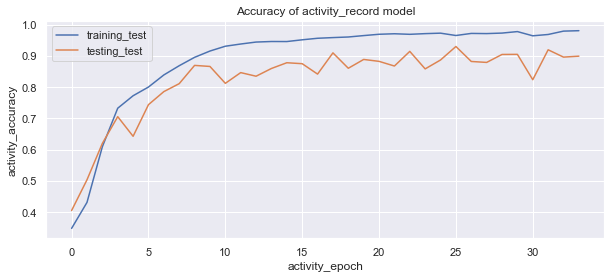

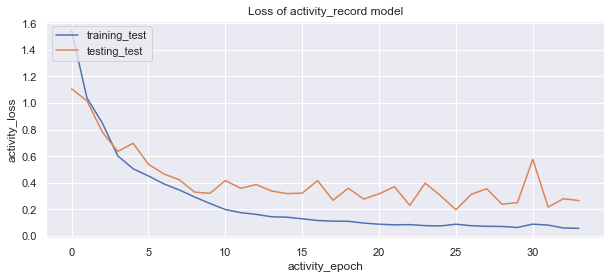

In [29]:
rcParams['figure.figsize'] = 10, 4
# Plot the history of activity_record model's accuracy
plt.plot(activity_record.history['accuracy'])
plt.plot(activity_record.history['val_accuracy'])
plt.title('Accuracy of activity_record model')
plt.ylabel('activity_accuracy')
plt.xlabel('activity_epoch')
plt.legend(['training_test', 'testing_test'], loc='upper left')
plt.show()

# Plot the history of activity_record model's loss
plt.plot(activity_record.history['loss'])
plt.plot(activity_record.history['val_loss'])
plt.title('Loss of activity_record model')
plt.ylabel('activity_loss')
plt.xlabel('activity_epoch')
plt.legend(['training_test', 'testing_test'], loc='upper left')
plt.show()

In [30]:
# Make predictions using the activity_record model 
y_activity_pred=activity_model.predict(X_activity_test)

In [31]:
# To retrieve the maximum value from the selected function
y_activity_test=np.argmax(y_activity_test,axis=1)
y_activity_pred=np.argmax(y_activity_pred,axis=1)

In [32]:
# Prints the y_activity_test values
y_activity_test

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

In [33]:
# Prints the y_activity_pred values
y_activity_pred

array([4, 3, 4, ..., 1, 1, 0], dtype=int64)

Text(0.5, 21.5, 'HAR Predicted Output')

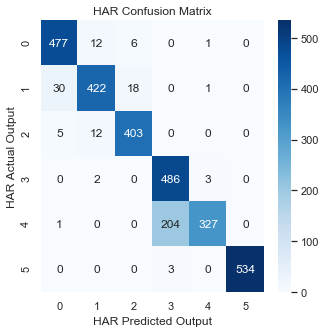

In [34]:
# Plot the Confusion matrix using y_activity_test, y_activity_pred
activity_fig, activity_ax=plt.subplots(figsize=(5,5))
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_activity_test, y_activity_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('HAR Confusion Matrix');
plt.ylabel('HAR Actual Output');
plt.xlabel('HAR Predicted Output')

In [35]:
# Prints the HAR classification report of the model
print(classification_report(y_activity_test, y_activity_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       496
           1       0.94      0.90      0.92       471
           2       0.94      0.96      0.95       420
           3       0.70      0.99      0.82       491
           4       0.98      0.61      0.76       532
           5       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.92      0.90      0.90      2947
weighted avg       0.92      0.90      0.90      2947



In [36]:
# Calculate the accuracy of the implemented model 
activity_model_accuracy=accuracy_score(y_activity_test,y_activity_pred)
activity_model_accuracy

0.8988802171700034